# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. With this new test format, <b>what are the best ways in which College Board can improve the statewide participation rates for the SAT?</b>



## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [773]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

sns.set_style('whitegrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [774]:
# Reading the CSV files using relative filepaths
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [775]:
# Printing a few lines of each dataframe to ensure that it was read properly.
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [776]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [777]:
# Checking the number of rows in the dataframe.
len(sat_2017)

51

In [778]:
# Checking the number of rows in the dataframe.
len(act_2017)

52

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

The data shows the SAT and ACT participation percentage and average scores for various subjects in the year 2017 for all the states across US:


<b>sat_2017 comprises of 5 columns:</b>
- individual States in US
- participation Rate (%)
- average evident Reading & writing score
- average math score
- average total score (evident Reading & writing score + math score)



<b>act_2017 comprises of 7 columns:</b>
- individual States in US
- participation Rate (%)
- average english score
- average math score
- average reading score
- average science score
- average total score

- For SAT, Science is not tested while English/Reading are combined and reported as 1 score under Evience based reading and writing.


<b>Source of data:</b>

SAT 2017 data is <a href="https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/">here</a>

ACT 2017 data is <a href="[here]https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf">here</a>

#### 4a. Does the data look complete? 

    Answer: Yes, the data looks complete as there are no empty values in the two datasets

In [779]:
# Checking for any empty values in SAT 2017 dataset.

sat_2017.isna().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [780]:
# Checking for any empty values in SAT 2017 dataset.

sat_2017.isna().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [781]:
# Checking for any empty values in ACT 2017 dataset.

act_2017.isna().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [782]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [783]:
# sat_state = [i for i in sat_2017['State']]
# act_state = [i for i in act_2017['State']]

# for i in act_state:
#     if i not in sat_state:
#         print(i)

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

In [784]:
#Checking all the aggregate values for SAT 2017
sat_2017.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


Looking at the above data, we can see that mininum Math score for one of the states is 52

In [785]:
#Fetching the details of the state where Math score is 52

sat_2017[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Observation: The total score above is 1060, so the Math score 52 looks dubious and needs to be modified

In [786]:
act_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


Looking at the above data, we can see that mininum Science score for one of the states is 2.3

In [787]:
#Fetching the details of the state where Science score is 2.3
act_2017[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Observation: The Composite score above is 23.6, so the Science score 2.3 looks dubious and needs to be modified


Answer:
- Upon checking against the source, we realised that the SAT_2017's Math score should be 524 and not 52, also the ACT_2017's Science score should be 23.2 instead of 2.3
- Also, there is an error in the data value for Wyoming's Composite (should be 20.2 instead of 20.2X), then column should be in float

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [788]:
##Before fixing the error for Wyoming's Composite :
act_2017[act_2017['State']=='Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [789]:
#Fix the error - for Wyoming's Composite (should be 20.2 instead of 20.2X)
act_2017.loc[act_2017['State']=='Wyoming','Composite']=20.2

In [790]:
#After fixing the error for Wyoming's Composite 
act_2017[act_2017['State']=='Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [791]:
##Before fixing the error for Maryland:
act_2017.loc[act_2017['State']=='Maryland']


,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [792]:
##Fixing the error for Marylanderror
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2

In [793]:
##After fixing the error for Maryland:
act_2017.loc[act_2017['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [794]:
##Before the error for Maryland for SAT
sat_2017.loc[sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [795]:
##Fixing the error for Maryland (SAT):
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math']= 524

In [796]:
##After fixing the error for Maryland (SAT):
sat_2017.loc[sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


#### 5. What are your data types? 
Display the data types of each feature. 

In [797]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [798]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
- Participation in both csv files are in "%" string, thus it is more appropriate change the data_type to float.
- Also, the Composite in act_2017 should be a float value

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [799]:
#Function to remove the % from Participation
def convert_to_num(df):
    df['Participation']=df['Participation'].str.replace('%',"").apply(pd.to_numeric, errors='coerce')
    return df

In [800]:
convert_to_num(act_2017)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2


In [801]:
convert_to_num(sat_2017)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055
5,Colorado,11,606,595,1201
6,Connecticut,100,530,512,1041
7,Delaware,100,503,492,996
8,District of Columbia,100,482,468,950
9,Florida,83,520,497,1017


- Fix any individual values preventing other columns from being the appropriate type.

In [802]:
act_2017['Composite'].dtype

dtype('O')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [803]:

# Converting 'Composite' column values to type float
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [804]:
#Code:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [805]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [806]:
# rename the columns in SAT_2017 
sat_2017.rename(columns={
    "Participation" : "sat2017_Participation",
    "Evidence-Based Reading and Writing" : "sat2017_Evidence-Based RW",
    "Math" : "sat2017_Math",
    "Total" : "sat2017_Total"
},inplace=True)

In [807]:
# rename the columns in ACT_2017 
act_2017.rename(columns={
    "Participation" : "act2017_Participation",
    "English" : "act2017_English",
    "Math" : "act2017_Math",
    "Reading" : "act2017_Reading",
    "Science" : "act2017_Science",
    "Composite" : "act2017_Composite"
},inplace=True)

In [808]:
# added a function to format the values in the columns with - or space
def clean_columns(x):
    x.columns=x.columns.str.lower()
    x.columns=x.columns.str.replace('-'," ")
    x.columns=x.columns.str.replace(" ","_")
    return (x.columns)

In [809]:
clean_columns(sat_2017)

Index(['state', 'sat2017_participation', 'sat2017_evidence_based_rw',
       'sat2017_math', 'sat2017_total'],
      dtype='object')

In [810]:
clean_columns(act_2017)

Index(['state', 'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 





|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT|The State of the country, in this case The United States of America| 
|sat2017_participation|float|SAT|The participation rate of the high school graduates across the __*2016-17*__ school year in a particular State.|
|sat2017_erw|int|SAT|The Evidence-based Reading and Writing section *mean* score of a State.|
|sat2017_math|int|SAT|The Math section *mean* score of a State.|
|sat2017_total|int|SAT|The Total *mean* score from both sections of a State.|
|act2017_participation|float|ACT|The participation rate of the high school graduates across the __*2016-17*__ school year in a particular State.|
|act2017_english|float|ACT|The English section *mean* score of a State.|
|act2017_math|float|ACT|The Math section *mean* score of a State.|
act2017_reading|float|ACT|The Reading section *mean* score of a State.|
act2017_science|float|ACT|The Science section *mean* score of a State|
|act2017_composite|float|ACT|The Composite *mean* score is an average score based on the four ACT assessment test of a State.|
|sat2018_participation|float|SAT|The participation rate of the high school graduates across the __*2017-18*__ school year in a particular State.|
|sat2018_erw|int|SAT|The Evidence-based Reading and Writing section *mean* score of a State.|
|sat2018_math|int|SAT|The Math section *mean* score of a State.|
|sat2018_total|int|SAT|The Total *mean* score from both sections of a State.|
|act2018_participation|float|ACT|The participation rate of the high school graduates across the __*2017-18*__ school year in a particular State.|
|act2018_english|float|ACT|The English section *mean* score of a State.|
|act2018_math|float|ACT|The Math section *mean* score of a State.|
act2018_reading|float|ACT|The Reading section *mean* score of a State.|
act2018_science|float|ACT|The Science section *mean* score of a State|
|act2018_composite|float|ACT|The Composite *mean* score is an average score based on the four ACT assessment test of a State.|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [811]:
#Before:
act_2017.head()

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [812]:
#remove the extra row where state = "National" as we are only analyzing the states  
act_2017.drop(0,inplace=True)

In [813]:
act_2017.head()

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


In [814]:
#code - reset the index for act_2017
act_2017.reset_index(drop = True,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [815]:
#Code: merging the 2017 dataframes into the combined dataframe 
combined_2017= pd.merge(sat_2017,act_2017, on='state',how='outer')

In [816]:
combined_2017.head()

,state,sat2017_participation,sat2017_evidence_based_rw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


In [817]:
combined_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [818]:
#code: Exporting the csv file to the indicated directory
combined_2017.to_csv("../data/combined_2017.csv")


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [819]:
#importing the csv file data for SAT & ACT 2018 to dataframes
sat_2018=pd.read_csv("../data/sat_2018.csv")
act_2018=pd.read_csv("../data/act_2018_updated.csv")

In [820]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [821]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [822]:
act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [823]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [824]:
#Chaging the participation rate data type
convert_to_num(sat_2018).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [825]:
#Renaming the columns for SAT 2018
sat_2018.rename(columns={
    "Participation" : "sat2018_Participation",
    "Evidence-Based Reading and Writing" : "sat2018_Evidence-Based RW",
    "Math" : "sat2018_Math",
    "Total" : "sat2018_Total"
},inplace=True)

In [826]:
# Fixing issues with column names
clean_columns(sat_2018)

Index(['state', 'sat2018_participation', 'sat2018_evidence_based_rw',
       'sat2018_math', 'sat2018_total'],
      dtype='object')

In [827]:
#Renaming column names for ACT 2018
act_2018.rename(columns={
    "Percentage of Students Tested" : "act2018_Participation",
    "Average English Score" : "act2018_English",
    "Average Math Score" : "act2018_Math",
    "Average Reading Score" : "act2018_Reading",
    "Average Science Score" : "act2018_Science",
    "Average Composite Score" : "act2018_Composite"
},inplace=True)

In [828]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                    51 non-null object
act2018_Participation    51 non-null int64
act2018_Composite        51 non-null float64
act2018_English          51 non-null float64
act2018_Math             51 non-null float64
act2018_Reading          51 non-null float64
act2018_Science          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [829]:
#Fixing any issue with column naming convention
clean_columns(act_2018)

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading',
       'act2018_science'],
      dtype='object')

In [830]:
#Merging the dataframes act 2018 and sat 2018 to combined 2018
combined_2018=pd.merge(act_2018,sat_2018, on='state', how='outer')
combined_2018.head()

,state,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_based_rw,sat2018_math,sat2018_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076


In [831]:
## Merging combined 2018 and 2017 into one dataframe: final
final = pd.merge(combined_2018, combined_2017, on='state', how='outer')
final.head()

,state,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_based_rw,sat2018_math,...,sat2017_participation,sat2017_evidence_based_rw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,...,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,...,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,...,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5,592,576,...,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1,60,540,536,...,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


In [832]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                        51 non-null object
act2018_participation        51 non-null int64
act2018_composite            51 non-null float64
act2018_english              51 non-null float64
act2018_math                 51 non-null float64
act2018_reading              51 non-null float64
act2018_science              51 non-null float64
sat2018_participation        51 non-null int64
sat2018_evidence_based_rw    51 non-null int64
sat2018_math                 51 non-null int64
sat2018_total                51 non-null int64
sat2017_participation        51 non-null int64
sat2017_evidence_based_rw    51 non-null int64
sat2017_math                 51 non-null int64
sat2017_total                51 non-null int64
act2017_participation        51 non-null int64
act2017_english              51 non-null float64
act2017_math                 51 non-null float64
act2017_reading              51 non-

In [833]:
final.tail(10)

,state,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_based_rw,sat2018_math,...,sat2017_participation,sat2017_evidence_based_rw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
41,South Dakota,77,21.9,20.8,21.6,22.4,22.2,3,622,618,...,3,612,603,1216,80,20.7,21.5,22.3,22.0,21.8
42,Tennessee,100,19.6,19.4,19.1,19.9,19.6,6,624,607,...,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8
43,Texas,41,20.6,19.6,20.6,21.1,20.8,66,520,512,...,62,513,507,1020,45,19.5,20.7,21.1,20.9,20.7
44,Utah,100,20.4,19.7,19.9,20.9,20.5,4,480,530,...,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3
45,Vermont,24,24.1,23.9,23.4,24.9,23.8,64,565,554,...,60,562,551,1114,29,23.3,23.1,24.4,23.2,23.6
46,Virginia,24,23.9,23.8,23.3,24.7,23.5,68,567,550,...,65,561,541,1102,29,23.5,23.3,24.6,23.5,23.8
47,Washington,24,22.2,21.4,22.2,22.7,22.0,69,543,538,...,64,541,534,1075,29,20.9,21.9,22.1,22.0,21.9
48,West Virginia,65,20.3,19.8,19.4,21.3,20.4,28,513,486,...,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4
49,Wisconsin,100,20.5,19.8,20.3,20.6,20.8,3,641,653,...,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5
50,Wyoming,100,20.0,19.0,19.7,20.6,20.3,3,633,625,...,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2


In [834]:
final.shape

(51, 21)

In [835]:
#do some final adjustments to the column name so is not too long
final.rename(columns={'sat2017_evidence_based_rw': 'sat2017_erw',
                     'sat2018_evidence_based_rw': 'sat2018_erw'
                    }, inplace=True)
final.columns

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_erw', 'sat2018_math', 'sat2018_total',
       'sat2017_participation', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

In [836]:
## Exporting the output of final into a comma separated file in a relative path data directory
final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [837]:
#Output of new panda
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act2018_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act2018_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act2018_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act2018_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9
sat2018_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat2018_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat2018_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat2018_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [838]:
#A function to manually calculate Standard Deviation

def cal_sd(data):
    m = sum(data)/len(data)
    summation = [((i-m)**2) for i in data]
    sd = round(math.sqrt(sum(summation)/(len(summation))),3)
    return sd


In [839]:
cal_sd(final['act2018_math'])

2.016

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [844]:
final.columns

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_erw', 'sat2018_math', 'sat2018_total',
       'sat2017_participation', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

In [845]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                    51 non-null object
act2018_participation    51 non-null int64
act2018_composite        51 non-null float64
act2018_english          51 non-null float64
act2018_math             51 non-null float64
act2018_reading          51 non-null float64
act2018_science          51 non-null float64
sat2018_participation    51 non-null int64
sat2018_erw              51 non-null int64
sat2018_math             51 non-null int64
sat2018_total            51 non-null int64
sat2017_participation    51 non-null int64
sat2017_erw              51 non-null int64
sat2017_math             51 non-null int64
sat2017_total            51 non-null int64
act2017_participation    51 non-null int64
act2017_english          51 non-null float64
act2017_math             51 non-null float64
act2017_reading          51 non-null float64
act2017_science          51 non-null float64
act2017_composite 

In [846]:

# Create a dictionary comprehension  
sd = {i: cal_sd(final[i]) for i in final.columns[1:]} #only to include numeric columns
sd

{'act2018_participation': 33.745,
 'act2018_composite': 2.086,
 'act2018_english': 2.422,
 'act2018_math': 2.016,
 'act2018_reading': 2.146,
 'act2018_science': 1.852,
 'sat2018_participation': 36.947,
 'sat2018_erw': 47.035,
 'sat2018_math': 47.302,
 'sat2018_total': 93.227,
 'sat2017_participation': 34.929,
 'sat2017_erw': 45.217,
 'sat2017_math': 46.657,
 'sat2017_total': 91.584,
 'act2017_participation': 31.824,
 'act2017_english': 2.33,
 'act2017_math': 1.962,
 'act2017_reading': 2.047,
 'act2017_science': 1.722,
 'act2017_composite': 2.001}

In [847]:
sd

{'act2018_participation': 33.745,
 'act2018_composite': 2.086,
 'act2018_english': 2.422,
 'act2018_math': 2.016,
 'act2018_reading': 2.146,
 'act2018_science': 1.852,
 'sat2018_participation': 36.947,
 'sat2018_erw': 47.035,
 'sat2018_math': 47.302,
 'sat2018_total': 93.227,
 'sat2017_participation': 34.929,
 'sat2017_erw': 45.217,
 'sat2017_math': 46.657,
 'sat2017_total': 91.584,
 'act2017_participation': 31.824,
 'act2017_english': 2.33,
 'act2017_math': 1.962,
 'act2017_reading': 2.047,
 'act2017_science': 1.722,
 'act2017_composite': 2.001}

In [848]:
np.std(final['act2018_english'])

2.4222536143202795

In [849]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act2018_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act2018_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act2018_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act2018_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9
sat2018_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat2018_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat2018_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat2018_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer
- No, because by default, using the .describe method, the standard deviations are normalized by N-1 (meaning it assumes that the dataset we collect is a sample and not the true population)
- However, by default, numpy.std returns the population standard deviation and in the formula given, it is based on population.
- in np.std, default ddof = 0
- in pd.std, default ddof is 1

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [850]:
#States with the highest and lowest participation rate
#1. 2017 SAT
print('2017 SAT Highest participation rate:')
# States with highest SAT participation rates in 2017
final.groupby('state')['sat2017_participation'].sum().sort_values(ascending=False).head(10)


2017 SAT Highest participation rate:


state
Connecticut             100
Delaware                100
District of Columbia    100
Michigan                100
New Hampshire            96
Maine                    95
Idaho                    93
Florida                  83
Massachusetts            76
Rhode Island             71
Name: sat2017_participation, dtype: int64

In [886]:
# States with highest SAT participation rates in 2018
print('2018 SAT Highest participation rate:')
final.groupby('state')['sat2018_participation'].sum().sort_values(ascending=False).head(10)

2018 SAT Highest participation rate:


state
Idaho                   100
Michigan                100
Delaware                100
Connecticut             100
Colorado                100
Illinois                 99
Maine                    99
Rhode Island             97
New Hampshire            96
District of Columbia     92
Name: sat2018_participation, dtype: int64

In [851]:
# States with highest ACT participation rates in 2017
print('2017 ACT Highest participation rate:')

final.groupby('state')['act2017_participation'].sum().sort_values(ascending=False).head()

2017 ACT Highest participation rate:


state
Wyoming     100
Oklahoma    100
Arkansas    100
Colorado    100
Kentucky    100
Name: act2017_participation, dtype: int64

In [887]:
# States with highest ACT participation rates in 2018
print('2018 ACT Highest participation rate:')

final.groupby('state')['act2018_participation'].sum().sort_values(ascending=False).head(17)

2018 ACT Highest participation rate:


state
Wyoming           100
Oklahoma          100
Arkansas          100
Kentucky          100
Louisiana         100
Mississippi       100
Wisconsin         100
Montana           100
Nebraska          100
Nevada            100
North Carolina    100
Ohio              100
Missouri          100
Alabama           100
South Carolina    100
Tennessee         100
Utah              100
Name: act2018_participation, dtype: int64

In [852]:
# States with highest mean for Composite in ACT_2017
final.groupby('state')['act2017_composite'].mean().sort_values(ascending=False).head()

state
New Hampshire           25.5
Massachusetts           25.4
Connecticut             25.2
Maine                   24.3
District of Columbia    24.2
Name: act2017_composite, dtype: float64

In [853]:
# States with highest mean for Composite in ACT_2018
final.groupby('state')['act2018_composite'].mean().sort_values(ascending=False).head()

state
Connecticut      25.6
Massachusetts    25.5
New Hampshire    25.1
New York         24.5
Michigan         24.4
Name: act2018_composite, dtype: float64

In [607]:
# States with lowest mean for Composite in ACT_2017
final.groupby('state')['act2017_composite'].mean().sort_values(ascending=True).head()

state
Nevada            17.8
Mississippi       18.6
South Carolina    18.7
Hawaii            19.0
North Carolina    19.1
Name: act2017_composite, dtype: float64

In [854]:
# States with lowest mean for Composite in ACT_2018
final.groupby('state')['act2018_composite'].mean().sort_values(ascending=True).head()

state
Nevada            17.7
South Carolina    18.3
Mississippi       18.6
Hawaii            18.9
Alabama           19.1
Name: act2018_composite, dtype: float64

In [860]:
# States for which the participation percentage decreased from 100% for SAT 2017
final[(final['sat2017_participation']==100) & (final['sat2018_participation']<100)][['state','sat2017_participation','sat2018_participation']]

,state,sat2017_participation,sat2018_participation
8,District of Columbia,100,92


In [610]:
# States for which the participation percentage increased to 100% for SAT 2018
final[(final['sat2018_participation']==100) & (final['sat2017_participation']<100)][['state','sat2017_participation','sat2018_participation']]

,state,sat2017_participation,sat2018_participation
5,Colorado,11,100
12,Idaho,93,100


As we can see above, state of Colorado and Idaho are the only states for which participation rate increased to 100% in 2018 for SAT

In [890]:
# States for which the participation percentage decreased from 100% in ACT 2018
final[(final['act2017_participation']==100) & (final['act2018_participation']<100)][['state','act2017_participation','act2018_participation']]

,state,act2017_participation,act2018_participation
5,Colorado,100,30
23,Minnesota,100,99


From above, we can notice that for state of Colorado and Minnesota are the only states for which participation rate decreased from 100% in 2018 for ACT

In [858]:
# States for which the participation percentage increased to 100% for ACT in 2018
final[(final['act2018_participation']==100) & (final['act2017_participation']<100)][['state','act2017_participation','act2018_participation']]

,state,act2017_participation,act2018_participation
27,Nebraska,84,100
35,Ohio,75,100


In [892]:
# States with more than 50% participation on both tests either year

final[((final['sat2017_participation']>50) & (final['act2017_participation']>50)) | ((final['sat2018_participation']>50) & (final['act2018_participation']>50))][['state','sat2017_participation','sat2018_participation','act2017_participation','act2018_participation']].reset_index(drop=True)
#

,state,sat2017_participation,sat2018_participation,act2017_participation,act2018_participation
0,Florida,83,56,73,66
1,Georgia,61,70,55,53
2,Hawaii,55,56,90,89
3,North Carolina,49,52,100,100
4,South Carolina,50,55,100,100


In [869]:
# States with a decrease in participation rate from 2017 to 2018 for SAT
final[((final['sat2017_participation'] - final['sat2018_participation']) > 0)][['state','sat2017_participation','sat2018_participation','act2017_participation','act2018_participation']].reset_index(drop=True)


,state,sat2017_participation,sat2018_participation,act2017_participation,act2018_participation
0,Arizona,30,29,62,66
1,District of Columbia,100,92,32,32
2,Florida,83,56,73,66
3,Nevada,26,23,100,100


In [885]:
# States with a significant increase in participation rate from 2017 to 2018 for SAT
final[((final['sat2018_participation'] - final['sat2017_participation']) > 50)][['state','sat2017_participation','sat2018_participation']].reset_index(drop=True).sort_values(ascending=False,by='sat2018_participation')


,state,sat2017_participation,sat2018_participation
0,Colorado,11,100
1,Illinois,9,99


In [875]:
# States with a decrease in participation rate from 2017 to 2018 for ACT
final[((final['act2017_participation'] - final['act2018_participation']) > 0)][['state','act2017_participation','act2018_participation']].reset_index(drop=True).head()

,state,act2017_participation,act2018_participation
0,Alaska,65,33
1,California,31,27
2,Colorado,100,30
3,Connecticut,31,26
4,Delaware,18,17


<b>Interesting Observations for SAT:</b>

- The Colorado state 's SAT particpation rate in 2017 was 11% but in 2018, it increased to 100%, conversely it's ACT particpation rate dropped from 100% to 30%.
- Illinois's participation rate has a significant increase for SAT from (9%) in 2017 to (99%) in 2018
- In Florida, we notice a decline in the participation rate (-30%) for SAT test and (-10%) for the ACT test.

<b>Interesting Observations for ACT:</b>
- Alaska has the highest drop in ACT participation rate from 65% in 2017 to 33% in 2018


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

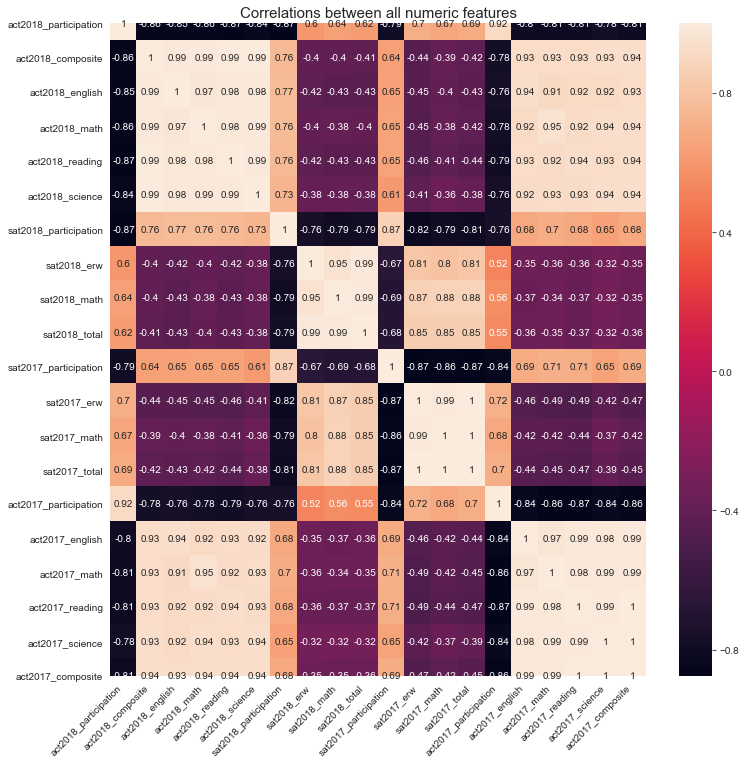

In [896]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(final.corr(), annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_title('Correlations between all numeric features', fontsize=15)
xlims=ax.get_xlim()
ylims=ax.get_xlim()
# ax.set_xlim(left=xlims[0]+1, right=xlims[1]+1)
# ax.set_ylim(left=ylims[0]+1, right=ylims[1]+1)
plt.show();

In [897]:
print( final[['sat2017_participation','act2017_participation']].corr())

                       sat2017_participation  act2017_participation
sat2017_participation               1.000000              -0.841234
act2017_participation              -0.841234               1.000000


In [898]:
print( final[['sat2018_participation','act2018_participation']].corr())

                       sat2018_participation  act2018_participation
sat2018_participation               1.000000              -0.868103
act2018_participation              -0.868103               1.000000


In [617]:
print( final[['sat2017_participation','sat2017_total']].corr())

                       sat2017_participation  sat2017_total
sat2017_participation                1.00000       -0.86754
sat2017_total                       -0.86754        1.00000


In [899]:
print( final[['sat2018_participation','sat2018_total']].corr())

                       sat2018_participation  sat2018_total
sat2018_participation               1.000000      -0.785926
sat2018_total                      -0.785926       1.000000


In [900]:
print( final[['act2017_participation','act2017_composite']].corr())

                       act2017_participation  act2017_composite
act2017_participation               1.000000          -0.858134
act2017_composite                  -0.858134           1.000000


In [901]:
print( final[['act2018_participation','act2018_composite']].corr())

                       act2018_participation  act2018_composite
act2018_participation               1.000000          -0.858031
act2018_composite                  -0.858031           1.000000


In [902]:
print( final[['sat2017_participation','sat2018_participation']].corr())

                       sat2017_participation  sat2018_participation
sat2017_participation               1.000000               0.874763
sat2018_participation               0.874763               1.000000


In [903]:
print( final[['act2017_participation','act2018_participation']].corr())

                       act2017_participation  act2018_participation
act2017_participation               1.000000               0.919171
act2018_participation               0.919171               1.000000


The heatmap is quite overwhelming, but <b>a few key observations</b> can be made form it:
- SAT and ACT participation rates have a strong negative correlation for both 2017 (-0.84) and 2018 (-0.87), which implies that students in each state on average take either the SAT or the ACT, and not both the tests.
- Test participation rates and average total/composite scores have a strong negative correlation for both SAT (-0.87 in 2017 & -0.79 in 2018) and ACT (-0.86 in 2017 & 2018), which implies that states with higher participation rates tend to have lower average total/composite scores, and vice-versa.
- 2017 and 2018 participation rates have a strong positive correlation for both SAT (+0.87) and ACT (+0.92), which implies that the year-to-year participation rates are generally consistent across states.

## Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [909]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#def subplot_histograms(dataframe, list_of_columns, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,nrows*6),sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=30) # feel free to add more settings
        
        
    # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles): 
        ax[i].title.set_text(title)
    
    for i, label in enumerate(list_of_xlabels): 
        ax[i].set_xlabel(label)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<b>Histogram 1</b>


In [905]:
#Variables to be used for histogram plotting

participation_rates=['act2017_participation','act2018_participation','sat2017_participation','sat2018_participation']
english_score=['act2017_english','act2018_english',]
math_score=['act2017_math','act2018_math','sat2017_math','sat2018_math']

reading_verbal_score=['act2017_reading','act2018_reading','sat2017_erw','sat2018_erw']
science_score=['act2017_science','act2018_science']
composite_total_score=['act2017_composite','act2018_composite','sat2017_total','sat2018_total']



participation_title=['2017-ACT_Participation','2018-ACT_Participation','2017-SAT_Participation','2018-SAT_Participation']
english_title=['2017-ACT(English)','2018-ACT(English)']
math_title=['2017-ACT(Math)','2018-ACT(Math)','2017-SAT(Math)','2018-SAT(Math)']


reading_verbal_title=['2017-ACT(Reading)','2018-ACT(Reading)','2017-SAT_Evidence-Based Reading & Writing','2018-SAT_Evidence-Based Reading & Writing']


science_title=['2017-ACT(Science)','2018-ACT(Science)']
composite_total_title=['2017-ACT_Composite','2018-ACT_Composite','2017-SAT_Total','2018-SAT_Total']



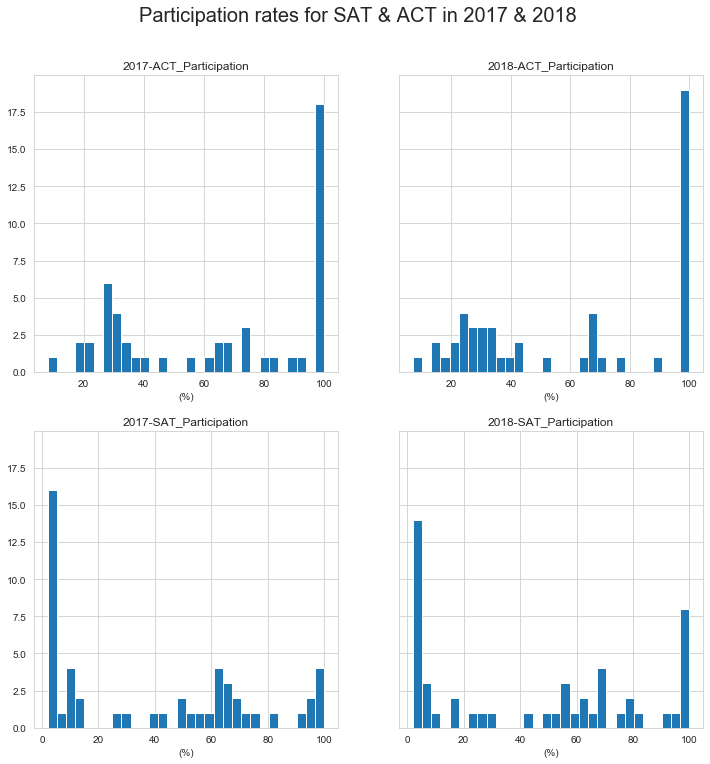

In [908]:
subplot_histograms(final,participation_rates,participation_title,labels_pct)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.96, t='Participation rates for SAT & ACT in 2017 & 2018', fontsize=20);

# Creating a note about X-axis units and establishing its position and size.
#plt.figtext(x=0.076, y=0.915, s="* units percent, where 0.02 represents 2%", fontsize=13);

# Exporting plot image in PNG format.
plt.savefig('../plot_image/histogram_1.png')

<b>Histogram 2 </b>

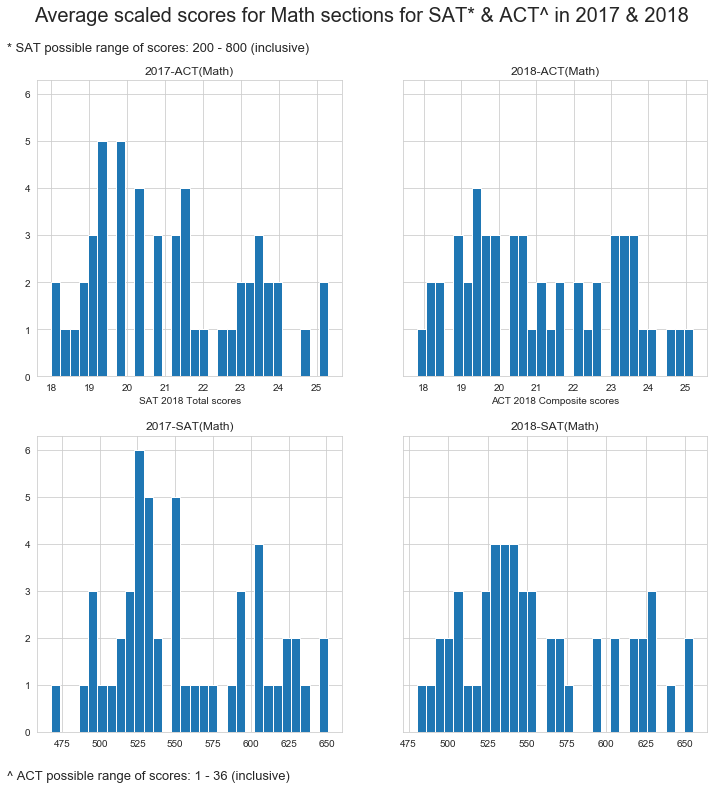

In [910]:
# Calling subplot_histograms() function and passing in all the necessary arguments.
subplot_histograms(final, math_score, math_title, list_of_xlabels)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.965, t='Average scaled scores for Math sections for SAT* & ACT^ in 2017 & 2018', fontsize=20)

# Creating notes about X-axis units and establishing their positions and sizes.
plt.figtext(x=0.09, y=0.913, s="* SAT possible range of scores: 200 - 800 (inclusive)", fontsize=13);
plt.figtext(x=0.09, y=0.07, s="^ ACT possible range of scores: 1 - 36 (inclusive)", fontsize=13);

# Exporting plot image in PNG format.
plt.savefig('../plot_image/histogram_2.png')

In [911]:
final[['sat2017_math', 'sat2018_math', 'act2017_math', 'act2018_math']].describe().T


,count,mean,std,min,25%,50%,75%,max
sat2017_math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.00,651.0
sat2018_math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.50,655.0
act2017_math,51.0,21.182353,1.981989,18.0,19.4,20.9,23.10,25.3
act2018_math,51.0,21.125490,2.035765,17.8,19.4,20.7,23.15,25.2


From the above plots, we observe the following:
- The distribution of the average scaled scores for SAT & ACT Math sections does not appear to be normally distributed.
- While the range of possible scores for SAT Math section is 200 - 800 (inclusive), all state averages are spread only in the ranges of ~475 - 650, with a higher proportion being around ~500 - 560. This implies that majority of the state averages are in the range of ~50-60%. This holds true for both 2017 and 2018.
- While the range of possible scores for ACT Math section is 1 - 36 (inclusive), all state averages are spread only in the ranges of ~18 - 27. This implies that the state averages are in the range of ~50-70%. This holds true for both 2017 and 2018.
- From the .describe() table above, the notice that our observtaions are valid, because the mean of SAT average math scores is ~556 for both 2017 and 2018, while

<b>Histogram 4</b>

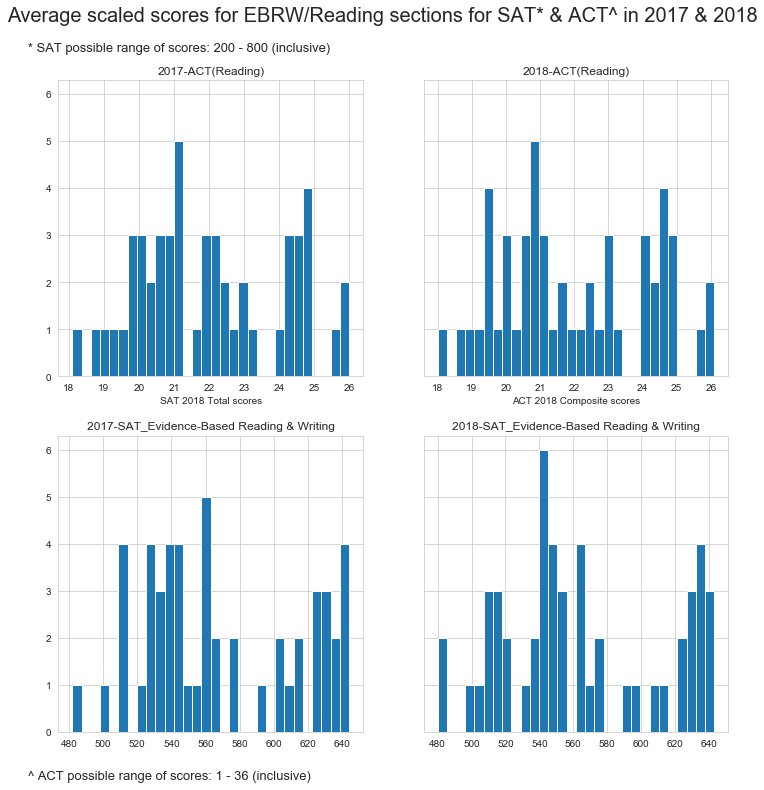

In [912]:
# Calling subplot_histograms() function and passing in all the necessary arguments.
subplot_histograms(final, reading_verbal_score, reading_verbal_title, list_of_xlabels)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.965, t='Average scaled scores for EBRW/Reading sections for SAT* & ACT^ in 2017 & 2018', fontsize=20)

# Creating notes about X-axis units and establishing their positions and sizes.
plt.figtext(x=0.09, y=0.913, s="* SAT possible range of scores: 200 - 800 (inclusive)", fontsize=13);
plt.figtext(x=0.09, y=0.07, s="^ ACT possible range of scores: 1 - 36 (inclusive)", fontsize=13);


In [630]:
final.columns

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_erw', 'sat2018_math', 'sat2018_total',
       'sat2017_participation', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

In [913]:
final[['sat2017_erw', 'sat2018_erw', 'act2017_reading', 'act2018_reading']].describe().T

,count,mean,std,min,25%,50%,75%,max
sat2017_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat2018_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1


From the above plots, we observe the following:
- The distribution of the average scaled scores for SAT & ACT ERW/Reading sections does not appear to be normally distributed.
- While the range of possible scores for SAT ERW section is 200 - 800 (inclusive), all state averages are spread only in the ranges of ~480 - 650. This implies that majority of the state averages are in the range of ~50-75%. This holds true for both 2017 and 2018.
- While the range of possible scores for ACT Reading section is 1 - 36 (inclusive), all state averages are spread only in the ranges of ~18 - 26. This implies that the state averages are in the range of ~50-70%. This holds true for both 2017 and 2018.
- From the .describe() table above, the notice that our observtaions are valid, because the mean of SAT average EBRW scores is ~565 for both 2017 and 2018, while that of ACT average reading scores is ~22.0.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [914]:
# Code
final.columns

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_erw', 'sat2018_math', 'sat2018_total',
       'sat2017_participation', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

In [917]:
def plot_scatter(dataframe,list_xcolumns,list_ycolumns,list_of_titles, list_of_xlabels, list_of_ylabels,sharex=True, sharey=True):
    # Setting number of rows of subplots according to number of columns given to plot
    nrows = int(np.ceil(len(list_of_xcols)/2))
    
    # Establishing figure and axis objects with desired number of subplot rows and columns
    # Figure size is set according to number of rows (nrows*6)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,nrows*6),sharex=sharex, sharey=sharey)
    
    ax = ax.ravel()   # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, x_col in enumerate(list_of_xcols):   # Gives us an index value to get into all our lists
        # Setting colour of subplot according to position:
        # Colour for subplots in left column = 'cornflowerblue'
        # Colour for subplots in right column = 'royalblue'
        colour = ''
        if i%2==0:
            colour = 'cornflowerblue'
        else:
            colour = 'royalblue'

        # Creating scatterplot in subplot for desired X- and Y-axis columns.
        ax[i].scatter(x=dataframe[x_col], y=dataframe[list_of_ycols[i]], color=colour)
        
        # Setting title of subplot from input list of titles
        ax[i].set_title(list_of_titles[i], fontsize=16, loc='left')
        
        # Setting label for X-axis from input list of labels
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=13)
        
        # Setting label for Y-axis from input list of labels
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=13)

<b>Scatter Plot 1</b>

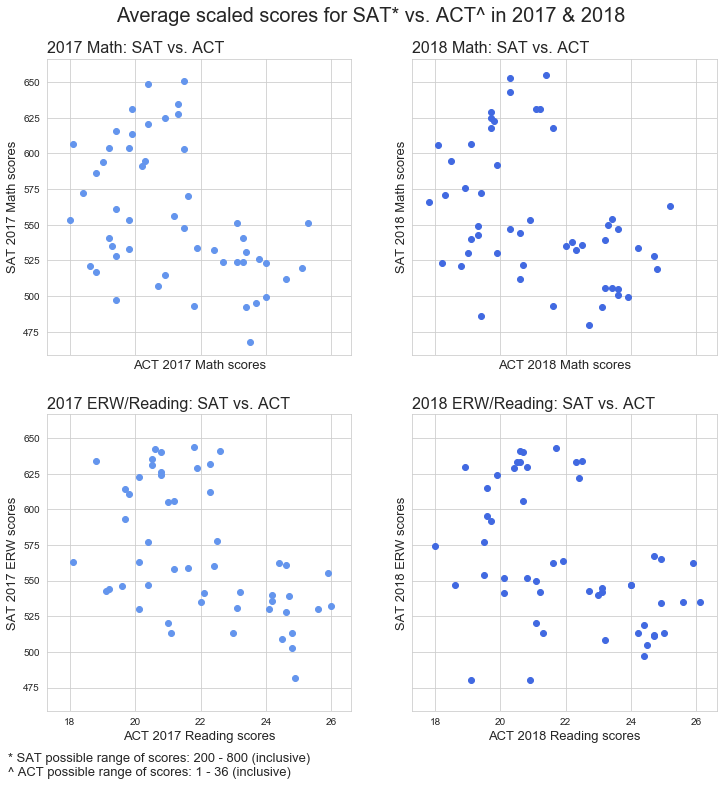

In [919]:
# Scatterplots for Math and ERW/Reading section scores for SAT vs. ACT in 2017 & 2018. 

# Defining lists of arguments required for the subplot_scatterplots() function defined above.
list_of_xcols = ['act2017_math',
                 'act2018_math',
                 'act2017_reading',
                 'act2018_reading'
                ]

list_of_ycols = ['sat2017_math',
                 'sat2018_math',
                 'sat2017_erw',
                 'sat2018_erw'
                ]

list_of_titles = ['2017 Math: SAT vs. ACT',
                  '2018 Math: SAT vs. ACT',
                  '2017 ERW/Reading: SAT vs. ACT',
                  '2018 ERW/Reading: SAT vs. ACT'
                 ]

list_of_xlabels = ['ACT 2017 Math scores',
                   'ACT 2018 Math scores',
                   'ACT 2017 Reading scores',
                   'ACT 2018 Reading scores'
                  ]

list_of_ylabels = ['SAT 2017 Math scores',
                   'SAT 2018 Math scores',
                   'SAT 2017 ERW scores',
                   'SAT 2018 ERW scores'
                  ]

# Calling plot_scatter() function and passing in all the necessary arguments.
plot_scatter(final, list_of_xcols, list_of_ycols, list_of_titles, list_of_xlabels, list_of_ylabels)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.94, t='Average scaled scores for SAT* vs. ACT^ in 2017 & 2018', fontsize=20)

# Creating a note about X-axis units and establishing its position and size.
plt.figtext(x=0.08, y=0.05, s="* SAT possible range of scores: 200 - 800 (inclusive)\n^ ACT possible range of scores: 1 - 36 (inclusive)", fontsize=13);


<b>Scatter Plot 2</b>

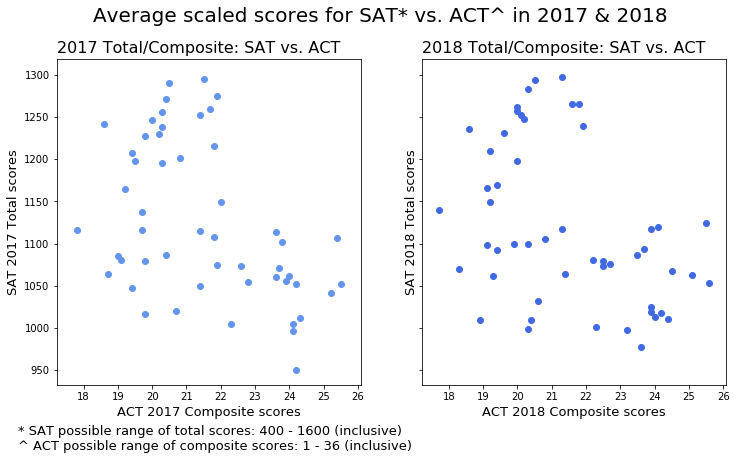

In [635]:
# Scatterplots for Total/Composite scores for SAT vs. ACT in 2017 & 2018. 

# Defining lists of arguments required for the subplot_scatterplots() function defined above.
list_of_xcols = ['act2017_composite',
                 'act2018_composite'
                ]

list_of_ycols = ['sat2017_total',
                 'sat2018_total'
                ]

list_of_titles = ['2017 Total/Composite: SAT vs. ACT',
                  '2018 Total/Composite: SAT vs. ACT'
                 ]

list_of_xlabels = ['ACT 2017 Composite scores',
                   'ACT 2018 Composite scores'
                  ]

list_of_ylabels = ['SAT 2017 Total scores',
                   'SAT 2018 Total scores'
                  ]

# Calling plot_scatter() function and passing in all the necessary arguments.
plot_scatter(final, list_of_xcols, list_of_ycols, list_of_titles, list_of_xlabels, list_of_ylabels)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=1, t='Average scaled scores for SAT* vs. ACT^ in 2017 & 2018', fontsize=20)

# Creating a note about X-axis units and establishing its position and size.
plt.figtext(x=0.08, y=-0.025, s="* SAT possible range of total scores: 400 - 1600 (inclusive)\n^ ACT possible range of composite scores: 1 - 36 (inclusive)", fontsize=13);


<b>Scatter Plot 3</b>

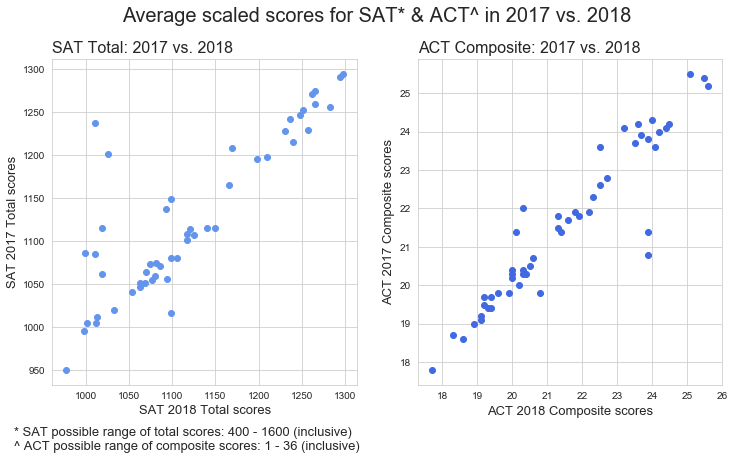

In [920]:
# Scatterplots for Total/Composite scores for SAT & ACT in 2017 vs. 2018. 

# Defining lists of arguments required for the plot_scatter() function defined above.

list_of_xcols = ['sat2018_total',
                 'act2018_composite'
                ]

list_of_ycols = ['sat2017_total',
                 'act2017_composite'
                ]

list_of_titles = ['SAT Total: 2017 vs. 2018',
                  'ACT Composite: 2017 vs. 2018'
                 ]

list_of_xlabels = ['SAT 2018 Total scores',
                   'ACT 2018 Composite scores'
                  ]

list_of_ylabels = ['SAT 2017 Total scores',
                   'ACT 2017 Composite scores'
                  ]

# Calling plot_scatter() function and passing in all the necessary arguments.
plot_scatter(final, list_of_xcols, list_of_ycols, list_of_titles, list_of_xlabels, list_of_ylabels,False,False)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=1, t='Average scaled scores for SAT* & ACT^ in 2017 vs. 2018', fontsize=20)

# Creating a note about X-axis units and establishing its position and size.
plt.figtext(x=0.08, y=-0.025, s="* SAT possible range of total scores: 400 - 1600 (inclusive)\n^ ACT possible range of composite scores: 1 - 36 (inclusive)", fontsize=13);


In [921]:
#SAT score decrease from 2017 to 2018 in the below states
final['sat2017_total'].head(10)

0    1165
1    1080
2    1116
3    1208
4    1055
5    1201
6    1041
7     996
8     950
9    1017
Name: sat2017_total, dtype: int64

In [638]:
final.columns

Index(['state', 'act2018_participation', 'act2018_composite',
       'act2018_english', 'act2018_math', 'act2018_reading', 'act2018_science',
       'sat2018_participation', 'sat2018_erw', 'sat2018_math', 'sat2018_total',
       'sat2017_participation', 'sat2017_erw', 'sat2017_math', 'sat2017_total',
       'act2017_participation', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite'],
      dtype='object')

<b>Observation:</b>
- 2017 ACT vs SAT Math Score : no correlation
- 2017 ACT vs SAT Verbal/Reading Score : no correlation
- 2017 ACT vs SAT Total/Composite Score : no correlation
- 2017 vs 2018 SAT Total Score : positive correlation
- 2017 vs 2018 ACT Composite Score : positive correlation


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

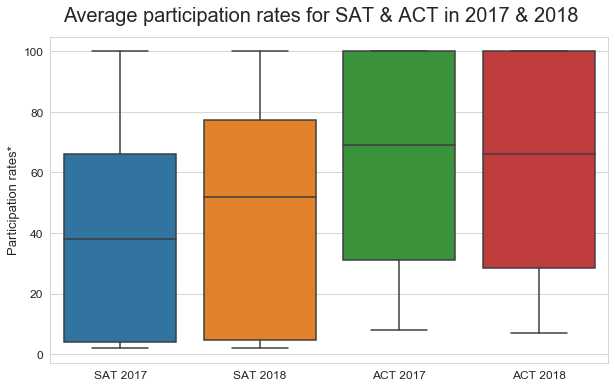

In [927]:
# Boxplots for participation rates for SAT & ACT in 2017 & 2018.

# Slicing out relevant columns from 'final' dataframe and melting them to create a dataframe with only 'variable' & 'value' columns.
par_melted = pd.melt(final[['sat2017_participation', 'sat2018_participation', 'act2017_participation', 'act2018_participation']])

# Setting the figure size.
plt.figure(figsize=(10,6))

# Creating the boxplot using seaborn and setting the data to the melted dataframe.
# Setting other arguments such as orientation, fliersize & outlier symbol.
# Assigning the boxplot to a matplotlib.axes object so as to be able to manipulate other features of the axis.
ax = sns.boxplot(x="variable", y="value", data=par_melted, orient='v', fliersize='6', sym='k.')

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.95, t='Average participation rates for SAT & ACT in 2017 & 2018', fontsize=20)

# Setting labels for X- and Y-axes.
ax.set_xlabel("", fontsize=13)
ax.set_ylabel("Participation rates*", fontsize=13)

# Defining list of X-axis tick mark labels
labels = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']

# Setting X-axis tick mark labels to defined labels list.
ax.set_xticklabels(labels)

# Adjusting size of tick mark labels for both axes.
ax.tick_params(axis='both', labelsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_image/box_plot_1.png')

In [929]:
final[['sat2017_participation', 'sat2018_participation', 'act2017_participation', 'act2018_participation']].describe().T

,count,mean,std,min,25%,50%,75%,max
sat2017_participation,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
sat2018_participation,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0
act2017_participation,51.0,65.254902,32.140842,8.0,31.0,69.0,100.0,100.0
act2018_participation,51.0,61.647059,34.080976,7.0,28.5,66.0,100.0,100.0


From the above plots, we observe the following:
- ACT participation rates are generally higher than SAT in both 2017 and 2018. From the .describe() table above, the median ACT participation rates are 69% (in 2017) and 66% (in 2018), while the median SAT participation rates are only 38% (in 2017) and 52% (in 2018).
- There is an increase in the median SAT participation rates from 2017 (38%) to 2018 (52%).

<b>Box Plot 2</b>

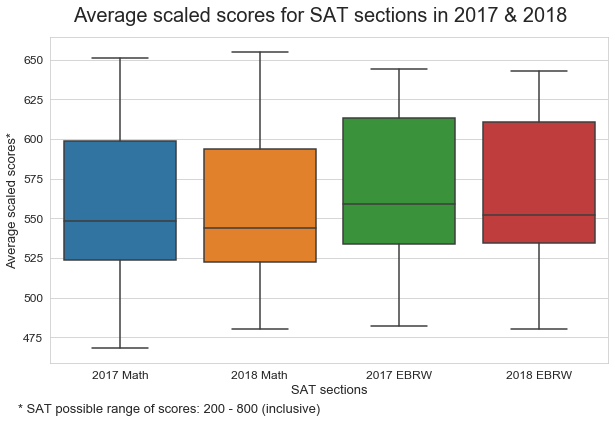

In [935]:
# Boxplots for Math and ERW section scores for SAT in 2017 & 2018.

# Slicing out relevant columns from 'satact_1718' dataframe and melting them to create a dataframe with only 'variable' & 'value' columns.
sat_sections_melted = pd.melt(final[['sat2017_math', 'sat2018_math', 'sat2017_erw', 'sat2018_erw']])

# Setting the figure size.
plt.figure(figsize=(10,6))

# Creating the boxplot using seaborn and setting the data to the melted dataframe.
# Setting other arguments such as orientation, fliersize & outlier symbol.
# Assigning the boxplot to a matplotlib.axes object so as to be able to manipulate other features of the axis.
ax = sns.boxplot(x="variable", y="value", data=sat_sections_melted, orient='v', fliersize='6', sym='k.')

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.95, t='Average scaled scores for SAT sections in 2017 & 2018', fontsize=20)

# Setting labels for X- and Y-axes.
ax.set_xlabel("SAT sections", fontsize=13)
ax.set_ylabel("Average scaled scores*", fontsize=13)

# Defining list of X-axis tick mark labels
labels = ['2017 Math', '2018 Math', '2017 EBRW', '2018 EBRW']

# Setting X-axis tick mark labels to defined labels list.
ax.set_xticklabels(labels)

# Adjusting size of tick mark labels for both axes.
ax.tick_params(axis='both', labelsize=12)

# Creating a note about Y-axis units and establishing its position and size.
plt.figtext(x=0.08, y=0.01, s="* SAT possible range of scores: 200 - 800 (inclusive)", fontsize=13);

# Exporting plot image in PNG format.
plt.savefig('../plot_image/box_plot_2.png')

In [937]:
final[['sat2017_math', 'sat2018_math', 'sat2017_erw', 'sat2018_erw']].describe().T

,count,mean,std,min,25%,50%,75%,max
sat2017_math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.0,651.0
sat2018_math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
sat2017_erw,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
sat2018_erw,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0


From the above plots, we observe the following:
The spread of average SAT scores for Math and ERW sections do not vary significantly year-to-year (from 2017 to 2018). From the .describe() table above, the median SAT Math scores are 548 (in 2017) and 544 (in 2018), while the median SAT ERW scores are 559 (in 2017) and 552 (in 2018).

<b>Box Plot 3</b>

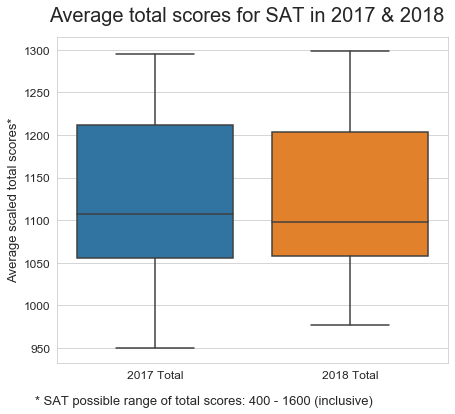

In [940]:
# Boxplots for Total scores for SAT in 2017 & 2018.

# Slicing out relevant columns from 'final' dataframe and melting them to create a dataframe with only 'variable' & 'value' columns.
sat_total_melted = pd.melt(final[['sat2017_total', 'sat2018_total']])

# Setting the figure size.
plt.figure(figsize=(7,6))

# Creating the boxplot using seaborn and setting the data to the melted dataframe.
# Setting other arguments such as orientation, fliersize & outlier symbol.
# Assigning the boxplot to a matplotlib.axes object so as to be able to manipulate other features of the axis.
ax = sns.boxplot(x="variable", y="value", data=sat_total_melted, orient='v', fliersize='6', sym='k.')

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.95, t='Average total scores for SAT in 2017 & 2018', fontsize=20)

# Setting labels for X- and Y-axes.
ax.set_xlabel("", fontsize=13)
ax.set_ylabel("Average scaled total scores*", fontsize=13)

# Defining list of X-axis tick mark labels
labels = ['2017 Total', '2018 Total']

# Setting X-axis tick mark labels to defined labels list.
ax.set_xticklabels(labels)

# Adjusting size of tick mark labels for both axes.
ax.tick_params(axis='both', labelsize=12)

# Creating a note about Y-axis units and establishing its position and size.
plt.figtext(x=0.08, y=0.03, s="* SAT possible range of total scores: 400 - 1600 (inclusive)", fontsize=13);

# Exporting plot image in PNG format.
plt.savefig('../plot_image/box_plot_3.png')


In [941]:
final[['sat2017_total', 'sat2018_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0
sat2018_total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


From the above plots, we observe the following:
- The spread of average SAT Total scores do not vary significantly year-to-year (from 2017 to 2018). From the .describe() table above, the median SAT Total scores are 1107 (in 2017) and 1098 (in 2018).


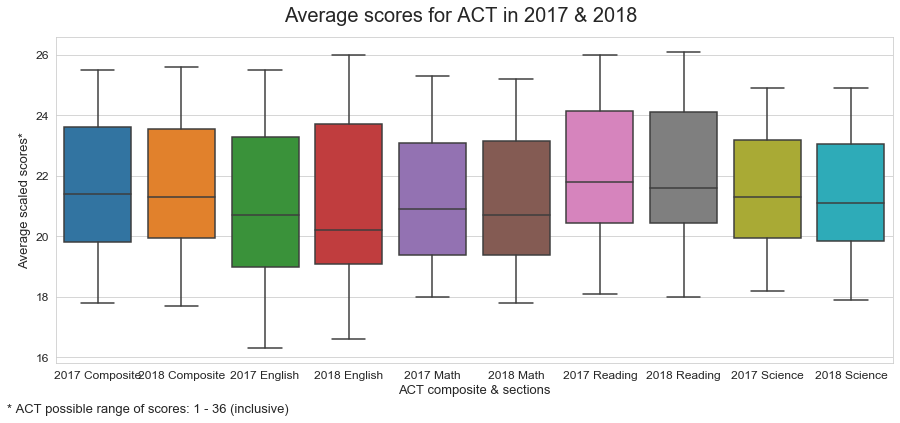

In [966]:
# Boxplots for scores for ACT in 2017 & 2018.

# Slicing out relevant columns from 'satact_1718' dataframe and melting them to create a dataframe with only 'variable' & 'value' columns.
act_melted = pd.melt(final[['act2017_composite', 'act2018_composite', 'act2017_english', 'act2018_english', 'act2017_math', 'act2018_math', 'act2017_reading', 'act2018_reading', 'act2017_science', 'act2018_science']])

# Setting the figure size.
plt.figure(figsize=(15,6))

# Creating the boxplot using seaborn and setting the data to the melted dataframe.
# Setting other arguments such as orientation, fliersize & outlier symbol.
# Assigning the boxplot to a matplotlib.axes object so as to be able to manipulate other features of the axis.
ax = sns.boxplot(x="variable", y="value", data=act_melted, orient='v', fliersize='6', sym='k.')

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=0.95, t='Average scores for ACT in 2017 & 2018', fontsize=20)

# Setting labels for X- and Y-axes.
ax.set_xlabel("ACT composite & sections", fontsize=13)
ax.set_ylabel("Average scaled scores*", fontsize=13)

# Defining list of X-axis tick mark labels
labels = ['2017 Composite', '2018 Composite', '2017 English', '2018 English', '2017 Math', '2018 Math', '2017 Reading', '2018 Reading', '2017 Science', '2018 Science']

# Setting X-axis tick mark labels to defined labels list.
ax.set_xticklabels(labels)

# Adjusting size of tick mark labels for both axes.
ax.tick_params(axis='both', labelsize=12)

# Creating a note about Y-axis units and establishing its position and size.
plt.figtext(x=0.08, y=0.01, s="* ACT possible range of scores: 1 - 36 (inclusive)", fontsize=13);

# Exporting plot image in PNG format.
plt.savefig('../plot_image/box_plot_4.png')

In [944]:
final[['act2017_composite', 'act2018_composite',
             'act2017_english', 'act2018_english',
             'act2017_math', 'act2017_math',
             'act2017_reading', 'act2018_reading',
             'act2017_science', 'act2018_science'
            ]].describe().T

,count,mean,std,min,25%,50%,75%,max
act2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act2018_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act2018_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


From the above plots, we observe the following:
The spread of average ACT scores do not vary significantly year-to-year (from 2017 to 2018). From the .describe() table above, the median ACT Composite scores are 21.4 (in 2017) and 21.3 (in 2018).
The median for all section scores have dropped slightly from 2017 to 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

For further review, we chose the following states where
- the 2018 SAT participation rate < 50% and total SAT score > mean of SAT score in 2018
- and composite score for ACT is less than 1 SD of the mean of ACT composite score in 2018

In [967]:
review=final[(final['sat2018_participation']<50) & (final['sat2018_total']>np.mean(final['sat2018_total'])) & (final['act2018_composite']<np.mean(final['act2018_composite'])-np.std(final['act2018_composite']))][['state','sat2018_participation','sat2018_total','act2018_participation','act2018_composite']].reset_index(drop=True)
review.sort_values('sat2018_total', ascending=False).reset_index(drop=True)

,state,sat2018_participation,sat2018_total,act2018_participation,act2018_composite
0,Mississippi,3,1236,100,18.6
1,Louisiana,4,1210,100,19.2
2,Arkansas,5,1169,100,19.4
3,Alabama,6,1166,100,19.1
4,Arizona,29,1149,66,19.2
5,Nevada,23,1140,100,17.7


### Additional Scatter Plots

Text(0.5, 1, 'Participation rates for SAT vs. ACT in 2017 & 2018')

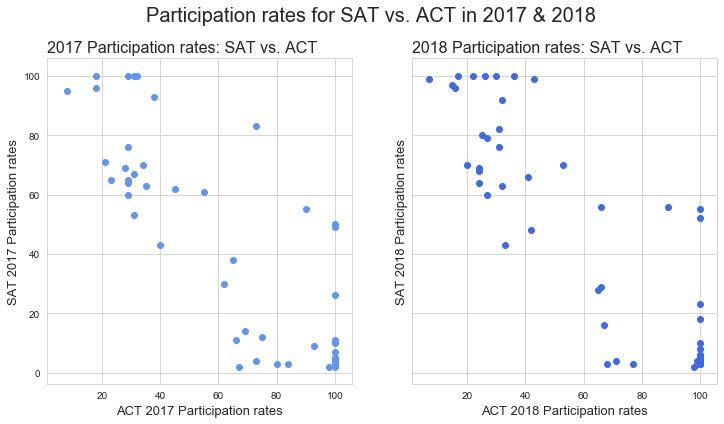

In [968]:
# Scatterplots for participation rates for SAT vs. ACT in 2017 & 2018.

# Defining lists of arguments required for the subplot_scatterplots() function defined above.

list_of_xcols = ['act2017_participation',
                 'act2018_participation'
                ]

list_of_ycols = ['sat2017_participation',
                 'sat2018_participation'
                ]

list_of_titles = ['2017 Participation rates: SAT vs. ACT',
                  '2018 Participation rates: SAT vs. ACT'
                 ]

list_of_xlabels = ['ACT 2017 Participation rates',
                   'ACT 2018 Participation rates'
                  ]

list_of_ylabels = ['SAT 2017 Participation rates',
                   'SAT 2018 Participation rates'
                  ]

# Calling plot_scatter() function and passing in all the necessary arguments.
plot_scatter(final, list_of_xcols, list_of_ycols, list_of_titles, list_of_xlabels, list_of_ylabels, sharex=True, sharey=True)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=1, t='Participation rates for SAT vs. ACT in 2017 & 2018', fontsize=20)


Text(0.5, 1, 'Participation rates for SAT & ACT in 2017 vs. 2018')

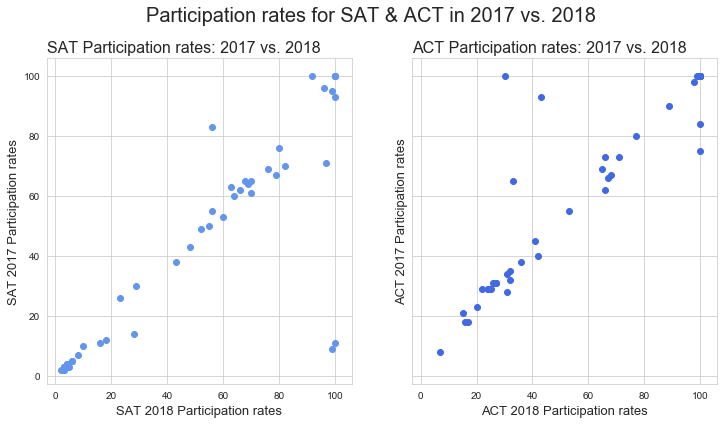

In [952]:
# Scatterplots for participation rates for SAT & ACT in 2017 vs. 2018.

# Defining lists of arguments required for the subplot_scatterplots() function defined above.

list_of_xcols = ['sat2018_participation',
                 'act2018_participation'
                ]

list_of_ycols = ['sat2017_participation',
                 'act2017_participation'
                ]

list_of_titles = ['SAT Participation rates: 2017 vs. 2018',
                  'ACT Participation rates: 2017 vs. 2018'
                 ]

list_of_xlabels = ['SAT 2018 Participation rates',
                   'ACT 2018 Participation rates'
                  ]

list_of_ylabels = ['SAT 2017 Participation rates',
                   'ACT 2017 Participation rates'
                  ]

# Calling plot_scatter() function and passing in all the necessary arguments.
plot_scatter(final, list_of_xcols, list_of_ycols, list_of_titles, list_of_xlabels, list_of_ylabels, sharex=True, sharey=True)

# Creating a title for the figure and establishing its position and size.
plt.suptitle(x=0.5, y=1, t='Participation rates for SAT & ACT in 2017 vs. 2018', fontsize=20)


From the above plots, we observe the following:

- There is a strong correlation between SAT and ACT Participation rates for both 2017 & 2018.
- The scatter plot shows that generally the participation rates of states do not vary year-to-year (2017 to 2018). States with low (or high) participation rates in 2017 also have low (or high) participation in 2018. As seen in the heatmap also, 2017 and 2018 participation rates have a strong positive correlation for both SAT (+0.87) and ACT (+0.92), which implies that the year-to-year participation rates are generally consistent across states.
- There are a few notable exceptions to this trend, however.
- There are a few states which had very low SAT participation rates in 2017, but they increased significantly in 2018 (one of them being Colorado, as seen in earlier section).
- There are a few states which had high ACT participation rates in 2017, but they decreased significantly in 2018

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [962]:
final.describe()

,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science,sat2018_participation,sat2018_erw,sat2018_math,sat2018_total,sat2017_participation,sat2017_erw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


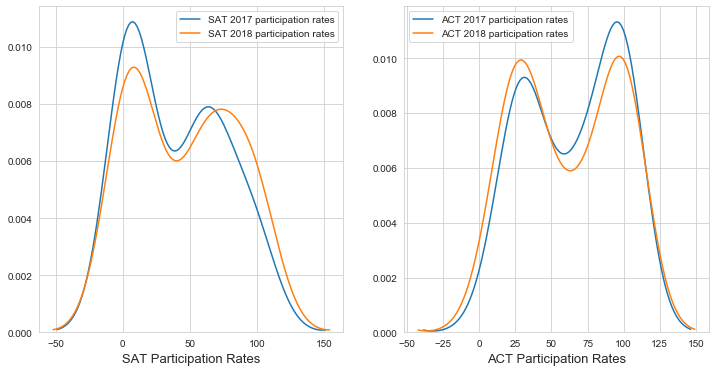

In [946]:
# Establish figure size.
plt.figure(figsize=(12,6))

# Creating subplots using plt.subplot(111) notation.
# plt.subplot(121) means we have 1 row, 2 columns, and are referencing plot 1.
plt.subplot(121)
ax1 = sns.distplot(final['sat2017_participation'], hist=False, kde = True, label='SAT 2017 participation rates');
ax1 = sns.distplot(final['sat2018_participation'], hist=False, kde = True, label='SAT 2018 participation rates');
ax1.set_xlabel("SAT Participation Rates", fontsize=13)
plt.legend()

# plt.subplot(122) means we have 1 row, 2 columns, and are referencing plot 2.
plt.subplot(122)
ax2 = sns.distplot(final['act2017_participation'], hist=False, kde = True, label='ACT 2017 participation rates');
ax2 = sns.distplot(final['act2018_participation'], hist=False, kde = True, label='ACT 2018 participation rates');
ax2.set_xlabel("ACT Participation Rates", fontsize=13);
plt.legend();

From the above plots, we observe the following:
- The participation rates for SAT and ACT are similarly distributed for both 2017 and 2018.
- The participation rates for both tests appear to be bimodal (having 2 peaks). If separated into two separate distributions, they may be normally distributed.

In [969]:
final[['sat2017_total', 'sat2018_total', 'act2017_composite', 'act2018_composite']].describe().T


,count,mean,std,min,25%,50%,75%,max
sat2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
sat2018_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6


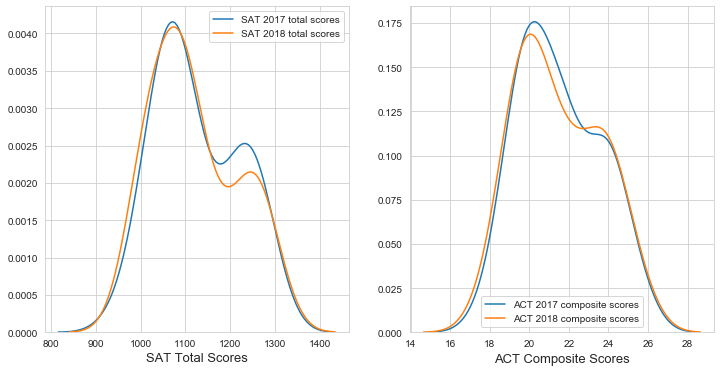

In [970]:
#Establish figure size.
plt.figure(figsize=(12,6))

# Creating subplots using plt.subplot(111) notation.
# plt.subplot(121) means we have 1 row, 2 columns, and are referencing plot 1.
plt.subplot(121)
ax1 = sns.distplot(final['sat2017_total'], hist=False, kde = True, label='SAT 2017 total scores');
ax1 = sns.distplot(final['sat2018_total'], hist=False, kde = True, label='SAT 2018 total scores');
ax1.set_xlabel("SAT Total Scores", fontsize=13)
plt.legend()

# plt.subplot(122) means we have 1 row, 2 columns, and are referencing plot 2.
plt.subplot(122)
ax2 = sns.distplot(final['act2017_composite'], hist=False, kde = True, label='ACT 2017 composite scores');
ax2 = sns.distplot(final['act2018_composite'], hist=False, kde = True, label='ACT 2018 composite scores');
ax2.set_xlabel("ACT Composite Scores", fontsize=13);
plt.legend();

<b>From the above plots, we observe the following:</b>
- The total/composite scores for SAT and ACT are similarly distributed for both 2017 and 2018.
- The total/composite scores for both tests appear to be bimodal (having 2 peaks). If separated into two separate distributions, they may be normally distributed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, almost all of the test results are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

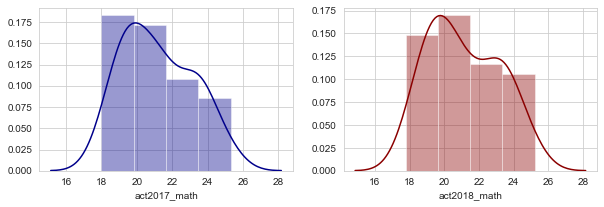

In [957]:
f, ax = plt.subplots(1,2,figsize=(10, 3))
sns.distplot(final['act2017_math'], ax=ax[0],color = 'darkblue');
sns.distplot(final['act2018_math'],ax=ax[1],color = 'darkred');

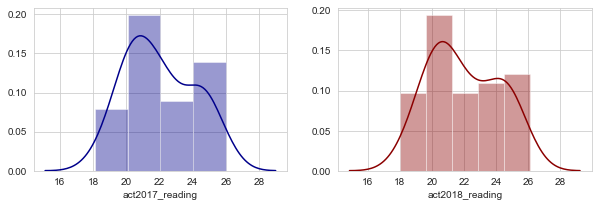

In [958]:
f, ax = plt.subplots(1,2,figsize=(10, 3))
sns.distplot(final['act2017_reading'], ax=ax[0],color = 'darkblue');
sns.distplot(final['act2018_reading'],ax=ax[1],color = 'darkred');

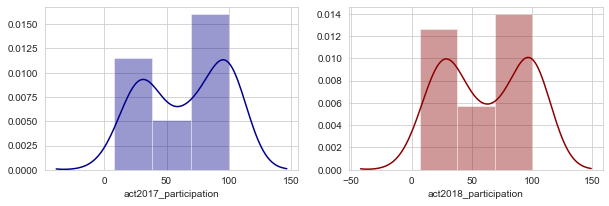

In [959]:
f, ax = plt.subplots(1,2,figsize=(10, 3))
sns.distplot(final['act2017_participation'], ax=ax[0],color = 'darkblue');
sns.distplot(final['act2018_participation'],ax=ax[1],color = 'darkred');

From the above plots, we observe the following:
- The ACT math and reading scores are similarly distributed for both 2017 and 2018.
- The participation rates for both tests appear to be bimodal (having 2 peaks). If separated into two separate distributions, they may be normally distributed.
- In this case, it may not be a good idea to apply CLT and infer the population parameters from these distributions directly. If we were to apply CLT in order to infer the population parameters from these distributions, they may result in incorrect values of the parameters which may affect our understanding of the population.
- We may need to explore/gather additional data variables which may help to separate the bimodal distributions into two normal distributions (for eg. absolute number of students taking the test per state?) which can then be used for inferring population parameters by apply CLT.

<b>Answer:</b>

The sample collected for each test (Math/Reading) from each state consist of 2 groups of students - prepared and unprepared for the tests.
Thus causing the bimodal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<b>Answer: </b>

No, SAT and ACT have different test measurements and also in each state, the test participation is affected by the state policy.


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<b>Answer:</b> 
- No, because SAT and ACT are 2 different test organisations.
- Also, the testing requirments are different for both tests. eg timing and the format/structure for each topic
- SAT's math features more word problems while ACT incorporates higher level math concepts
- Calculators are allowed for all ACT Math questions while for SAT, there is a section where calculator isn;t allowed
- So it is not a fair comparision to say that students with higher SAT math score is better than those with lower ACT math score

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [960]:
# Code:

# H0: ACT mean participation = SAT mean participation
# HA: ACT mean participation != SAT mean participation

# 2018 ACT participation
m1=np.mean(final['act2018_participation'])
std1=np.std(final['act2018_participation'])

# 2018 SAT participation
m2=np.mean(final['sat2018_participation'])
std2=np.std(final['sat2018_participation'])



t_stat,pvalue = stats.ttest_ind_from_stats(m1,std1,51, m2,std2,51,equal_var=False)
t_stat,pvalue

(2.2695342554499485, 0.025400627041621483)

- level of significance = 0.05
- pvalue < 0.05, thus reject H0
- There is a difference between ACT mean participation and SAT mean participation

In [971]:
final['sat2017_participation'].describe()

count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: sat2017_participation, dtype: float64

In [677]:
final['sat2018_participation'].describe()

count     51.000000
mean      45.745098
std       37.314256
min        2.000000
25%        4.500000
50%       52.000000
75%       77.500000
max      100.000000
Name: sat2018_participation, dtype: float64

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

As mentioned in the above section, three states which show interesting trends in their SAT and/or ACT participation rates are Colorado, Illinois and Alaska.
- <b>Colorado:</b> SAT participation rates increased from 11% in 2017 to 100% in 2018, whereas ACT participation rates decreased from 100% in 2017 to 30% in 2018.
- <b>Illinois:</b> SAT participation rates increased from 9% in 2017 to 99% in 2018, whereas ACT participation rates decreased from 93% in 2017 to 43% in 2018.
- This is because of the fact that College Board has expanded its market share through contracts with states and school systems that enable students to take the SAT free.
- <b>Alaska:</b> ACT participation rates decreased from 65% in 2017 to 33% in 2018, while SAT participation rates increased from 38% in 2017 to 43% in 2018.
- This could be because of the fact that Alaska 'repealed the testing requirements' for its high school students in 2016. Students are now no longer required to take either the SAT or the ACT in order to get their high school diplomas.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

- From all the above analysis of the given data, we have seen that the SAT participation rates in US states, on average, are generally lower as compared to ACT participation rates.

- We see similar trends from these box plots - ACT participation rates are generally higher than those of SAT in both 2017 and 2018. The median ACT participation rates are 69% (in 2017) and 66% (in 2018), while the median SAT participation rates are only 38% (in 2017) and 52% (in 2018). However, this also shows that there is an increase in the median SAT participation rates from 2017 (38%) to 2018 (52%).

- We also see from these scatter plots that there is a negative correlation between average SAT and ACT participation rates for 2017 & 2018. In general, if states have a higher participation rate for SAT, they have a lower participation rate for ACT, and vice-versa.
- SAT and ACT participation rates have a strong negative correlation for both 2017 (-0.84) and 2018 (-0.87). This implies that students in each state on average take either the SAT or the ACT, and not both the tests. So, in order to increase the SAT participation rates, College Board will have to explore strategies to take over the ACT market share and make the SAT more appealing than the ACT to students, schools and colleges.


However, there are a few notable exceptions to this trend. There are a few states which had very low SAT participation rates in 2017, but they increased significantly in 2018. Colorado and Illinois are clear examples of this trend. On further research, we see that this is mainly because of the fact that College Board has 'expanded its market share through contracts with states and school systems that enable students to take the SAT free'.

<b>recommendations for College Board</b>:
- Contracts with more states, schools and colleges. As seen above, state-wide testing contracts with states like <a href="https://www.testive.com/illinois/">Illinois</a> and <a href="https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/">Colorado</a>, have definitely improved the participation rates in favour of the SAT by a very significant margin.
- Explore potential avenues to make the SAT more accessible and affordable for students.
   - Accessibility implies making more centres and test dates available across the US.
   - Affordability implies making more financial aid available for the students, esp. from lower income groups.
  - One way this could be achieved is through state-wide testing contracts, as seen here.
    - The implications of these methods could be analysed if the following additional data were made available:
    - Data on offering greater flexibility in test dates (eg. possibility of taking the test on weekday in school), and proportions of students that avail this increase in availability of test slots.
    - Data on proportions of students that utilize/avail financial aid to take the SAT/ACT in each state.
- Explore ways to get ahead of the 'test-optional' trend being adopted by colleges and universities. As more and more colleges drop the requirement for students to submit SAT/ACT scores during the admissions process, SAT may require a complete and creative overhaul of the testing system so as to cater to the new admissions landscape while retaining market share.
